In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("E:\\temperature.csv")
df.head(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.shape

(7752, 25)

In [4]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


mean minimum temperature is 22.9 and maximum temperature is 30.2

___checking for null values

In [5]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

___Handling null values

In [8]:
df_new=df

In [9]:
df_new['station'].fillna((df_new['station'].mode().iloc()), inplace=True)

In [10]:
df_new['Date'].fillna((df['Date'].mode().iloc()), inplace=True)

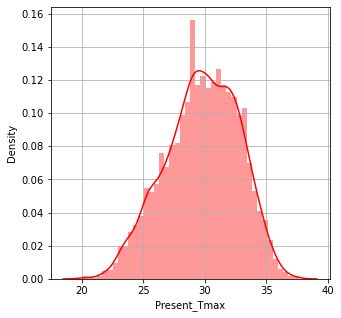

In [11]:
plt.figure(figsize=(5,5))
sns.distplot(df['Present_Tmax'],color='red',kde=True)
plt.grid()

present Tmax feature forms normal curve so I'm using mean to fill null values

In [12]:
df_new['Present_Tmax'].fillna((df['Present_Tmax'].mean()), inplace=True)

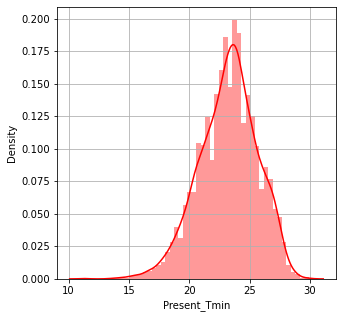

In [13]:
plt.figure(figsize=(5,5))
sns.distplot(df['Present_Tmin'],color='red',kde=True)
plt.grid()

present Tmin feature forms normal curve so I'm using mean to fill null values

In [14]:
df_new['Present_Tmin'].fillna((df['Present_Tmin'].mean()), inplace=True)

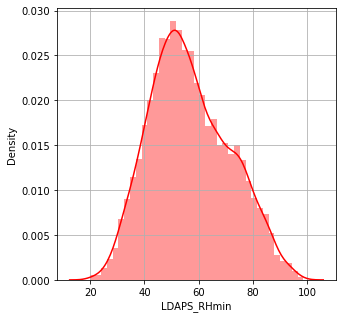

In [15]:
plt.figure(figsize=(5,5))
sns.distplot(df['LDAPS_RHmin'],color='red',kde=True)
plt.grid()

LDAPS_RHmin feature forms almost normal curve so I'm using mean to fill null values

In [16]:
df_new['LDAPS_RHmin'].fillna((df['LDAPS_RHmin'].mean()), inplace=True)

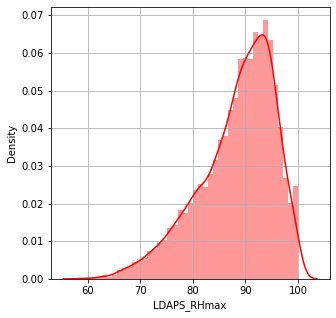

In [17]:
plt.figure(figsize=(5,5))
sns.distplot(df['LDAPS_RHmax'],color='red',kde=True)
plt.grid()

In [18]:
df_new['LDAPS_RHmax'].fillna((df['LDAPS_RHmax'].mean()), inplace=True)

LDAPS_RHmin feature forms almost normal curve so I'm using mean to fill null values

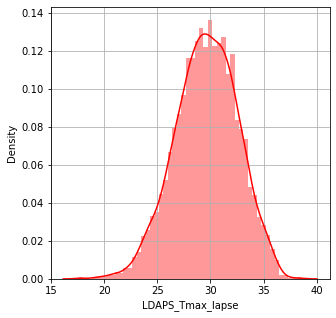

In [19]:
plt.figure(figsize=(5,5))
sns.distplot(df['LDAPS_Tmax_lapse'],color='red',kde=True)
plt.grid()


In [20]:
df_new['LDAPS_Tmax_lapse'].fillna((df['LDAPS_Tmax_lapse'].mean()), inplace=True)

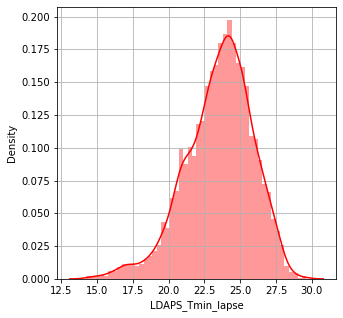

In [21]:
plt.figure(figsize=(5,5))
sns.distplot(df['LDAPS_Tmin_lapse'],color='red',kde=True)
plt.grid()

In [22]:
df_new['LDAPS_Tmin_lapse'].fillna((df['LDAPS_Tmin_lapse'].mean()), inplace=True)

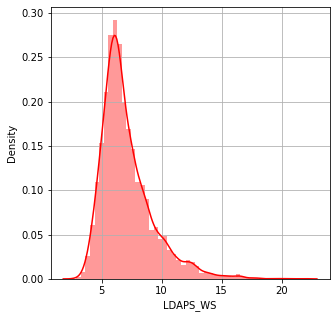

In [23]:
plt.figure(figsize=(5,5))
sns.distplot(df['LDAPS_WS'],color='red',kde=True)
plt.grid()

In [24]:
df_new['LDAPS_WS'].fillna((df['LDAPS_WS'].mean()), inplace=True)

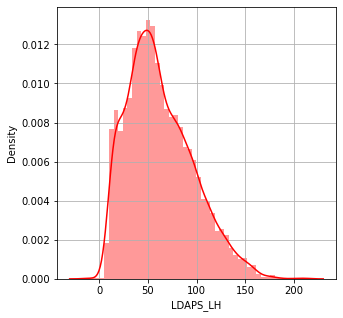

In [25]:
plt.figure(figsize=(5,5))
sns.distplot(df['LDAPS_LH'],color='red',kde=True)
plt.grid()

In [26]:
df_new['LDAPS_LH'].fillna((df['LDAPS_LH'].mean()), inplace=True)

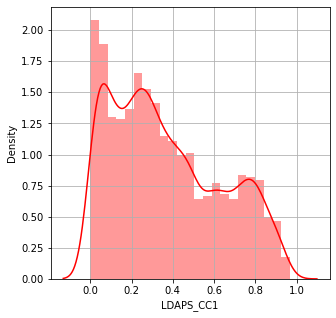

In [27]:
plt.figure(figsize=(5,5))
sns.distplot(df['LDAPS_CC1'],color='red',kde=True)
plt.grid()

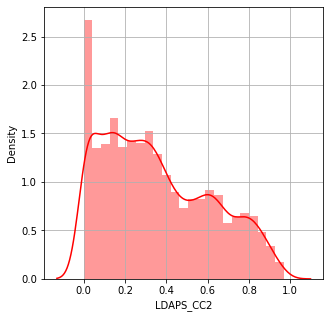

In [28]:
plt.figure(figsize=(5,5))
sns.distplot(df['LDAPS_CC2'],color='red',kde=True)
plt.grid()

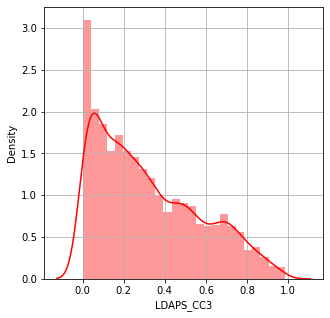

In [29]:
plt.figure(figsize=(5,5))
sns.distplot(df['LDAPS_CC3'],color='red',kde=True)
plt.grid()

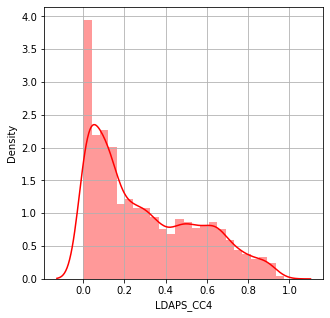

In [30]:
plt.figure(figsize=(5,5))
sns.distplot(df['LDAPS_CC4'],color='red',kde=True)
plt.grid()

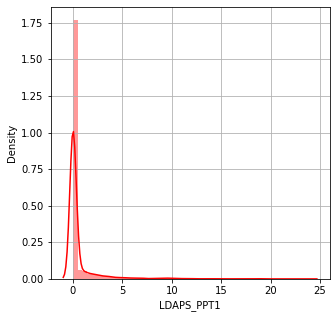

In [31]:
plt.figure(figsize=(5,5))
sns.distplot(df['LDAPS_PPT1'],color='red',kde=True)
plt.grid()

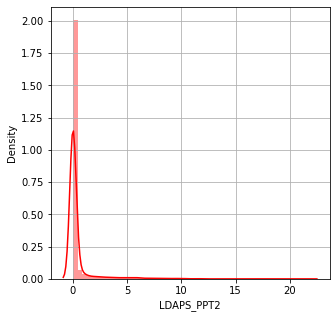

In [32]:
plt.figure(figsize=(5,5))
sns.distplot(df['LDAPS_PPT2'],color='red',kde=True)
plt.grid()

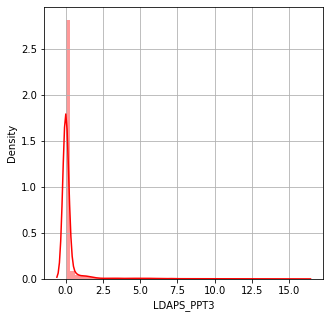

In [33]:
plt.figure(figsize=(5,5))
sns.distplot(df['LDAPS_PPT3'],color='red',kde=True)
plt.grid()

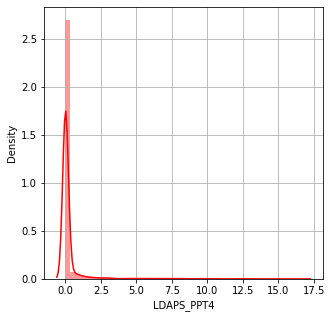

In [34]:
plt.figure(figsize=(5,5))
sns.distplot(df['LDAPS_PPT4'],color='red',kde=True)
plt.grid()

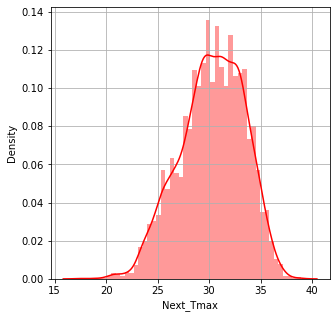

In [35]:
plt.figure(figsize=(5,5))
sns.distplot(df['Next_Tmax'],color='red',kde=True)
plt.grid()

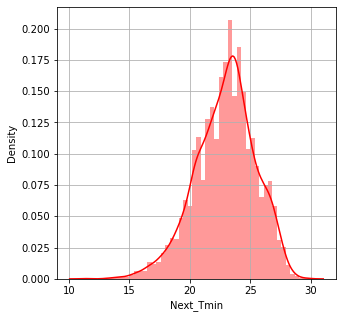

In [36]:
plt.figure(figsize=(5,5))
sns.distplot(df['Next_Tmin'],color='red',kde=True)
plt.grid()

In [37]:
col2=['LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','Solar radiation', 'Next_Tmax', 'Next_Tmin']

In [38]:
for i in range(0,11):
    df_new[col2[i]].fillna((df[col2[i]].median()), inplace=True)

the null values of above features are replaced with median because the features are not forming normal curve

In [39]:
df_new.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

no null values

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

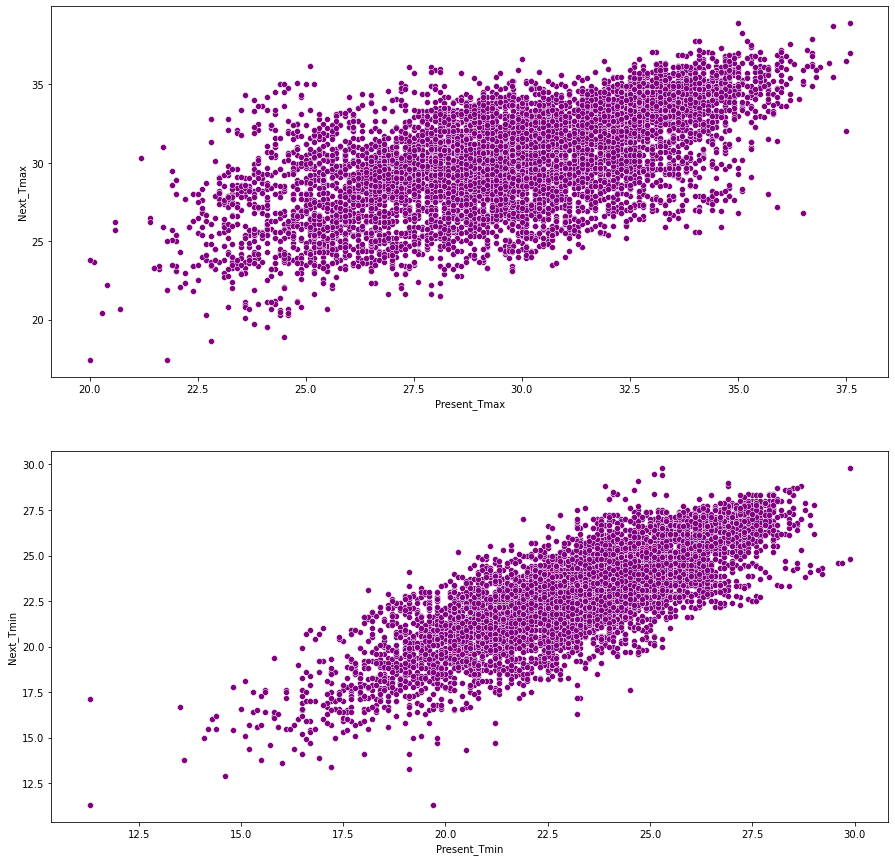

In [40]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.scatterplot(x='Present_Tmax',y='Next_Tmax',data=df_new,color="purple")

plt.subplot(2,1,2)
sns.scatterplot(x='Present_Tmin',y='Next_Tmin',data=df_new,color="purple")

In [41]:
next day temperatures both min and max increases gradually with present day temperatures

SyntaxError: invalid syntax (<ipython-input-41-eba2f60942e2>, line 1)

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.scatterplot(x='LDAPS_RHmax',y='Next_Tmax',data=df_new,color="red")

plt.subplot(2,1,2)
sns.scatterplot(x='LDAPS_RHmin',y='Next_Tmin',data=df_new,color="red")

humidity level is constant for different temperatures

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Next_Tmin'>

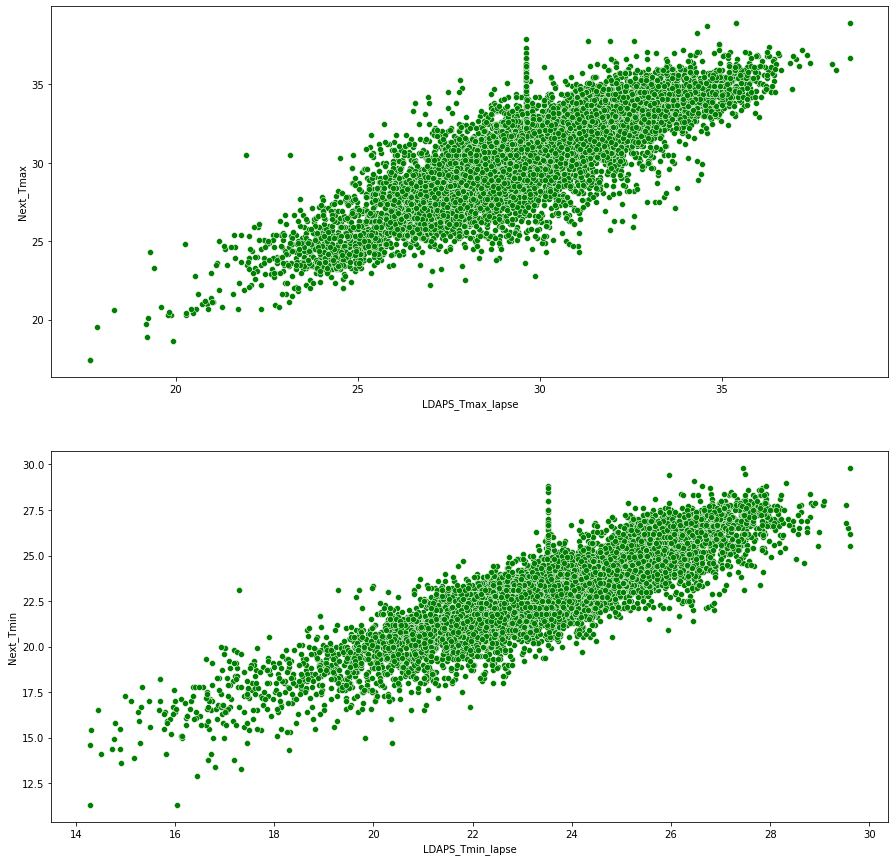

In [43]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.scatterplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df_new,color="green")

plt.subplot(2,1,2)
sns.scatterplot(x='LDAPS_Tmin_lapse',y='Next_Tmin',data=df_new,color="green")

next day temperatures both min and max increases gradually with next day air temperatures

In [44]:
cols=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']

<Figure size 2160x2160 with 0 Axes>

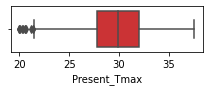

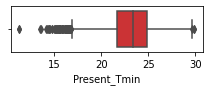

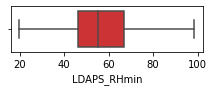

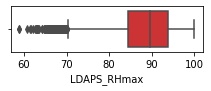

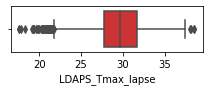

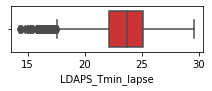

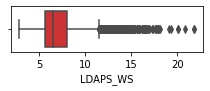

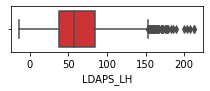

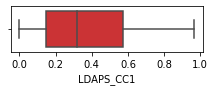

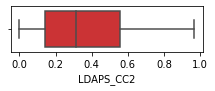

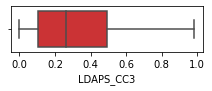

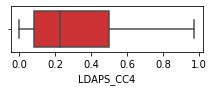

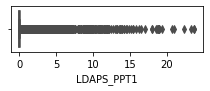

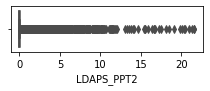

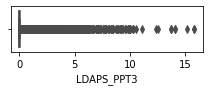

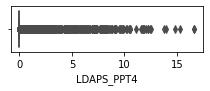

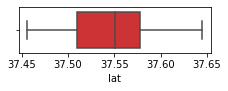

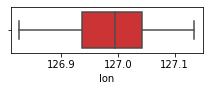

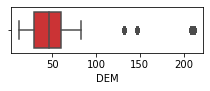

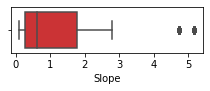

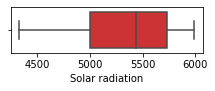

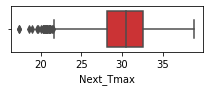

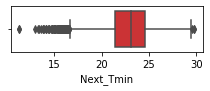

In [45]:
ncol=5
nrows=20
plt.figure(figsize=(30,30))
for i in range(0,23):
    plt.figure(figsize=(20,20))
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(x=cols[i],data=df_new,palette="Set1")

In [46]:
df_new['LDAPS_WS'].value_counts()

7.097875     75
21.857621     2
2.882580      2
14.510165     1
6.749056      1
             ..
7.769172      1
5.507503      1
5.109735      1
5.471099      1
5.009154      1
Name: LDAPS_WS, Length: 7676, dtype: int64

___Handling outliers

In [47]:
cols=['Present_Tmax', 'Present_Tmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','DEM', 'Slope', 'Next_Tmax', 'Next_Tmin']
data_clean=df_new
for i in cols:
    z = np.abs(zscore(df_new[i]))
print(np.where(z > 3))

(array([3166, 3184, 3190, 3191, 4566, 6066, 6076, 6084, 6090, 6091, 6126,
       6134, 6141, 6150, 6166, 6175, 6186, 7609, 7616, 7675, 7700, 7701,
       7709, 7711, 7715, 7716, 7718, 7719, 7725, 7726, 7734, 7741, 7750],
      dtype=int64),)


In [48]:
data_clean = df_new[(z<3)]

In [49]:
for i in range(0,15):
    print(cols[i],"=",data_clean[cols[i]].skew())

Present_Tmax = -0.24636469979879533
Present_Tmin = -0.31397408498040164
LDAPS_RHmax = -0.8551993171006133
LDAPS_Tmax_lapse = -0.19847497737496678
LDAPS_Tmin_lapse = -0.5165891849808774
LDAPS_WS = 1.5755330238963294
LDAPS_LH = 0.6791048416636826
LDAPS_PPT1 = 5.383093905355716
LDAPS_PPT2 = 5.766368451321981
LDAPS_PPT3 = 6.470172952760983
LDAPS_PPT4 = 6.814987045752524
DEM = 1.7320114462564755
Slope = 1.5667720762376145
Next_Tmax = -0.31912016462430404
Next_Tmin = -0.2848425303749382


In [50]:
col_s=['LDAPS_WS','LDAPS_RHmax',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation']
df_clean=data_clean

In [51]:
from sklearn.preprocessing import power_transform
df_clean[col_s]=power_transform (data_clean[col_s])

In [52]:
for i in range(0,15):
    print(cols[i],"=",df_clean[cols[i]].skew())

Present_Tmax = -0.24636469979879533
Present_Tmin = -0.31397408498040164
LDAPS_RHmax = -0.11508812551396357
LDAPS_Tmax_lapse = -0.19847497737496678
LDAPS_Tmin_lapse = -0.5165891849808774
LDAPS_WS = 0.0036402593440896785
LDAPS_LH = 0.032162550059851164
LDAPS_PPT1 = 1.46113582599764
LDAPS_PPT2 = 1.642999933821955
LDAPS_PPT3 = 1.8228163894627298
LDAPS_PPT4 = 2.0582461554279297
DEM = 0.03948930461233253
Slope = 0.2344636185393631
Next_Tmax = -0.31912016462430404
Next_Tmin = -0.2848425303749382


In [165]:
df_clean.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<AxesSubplot:>

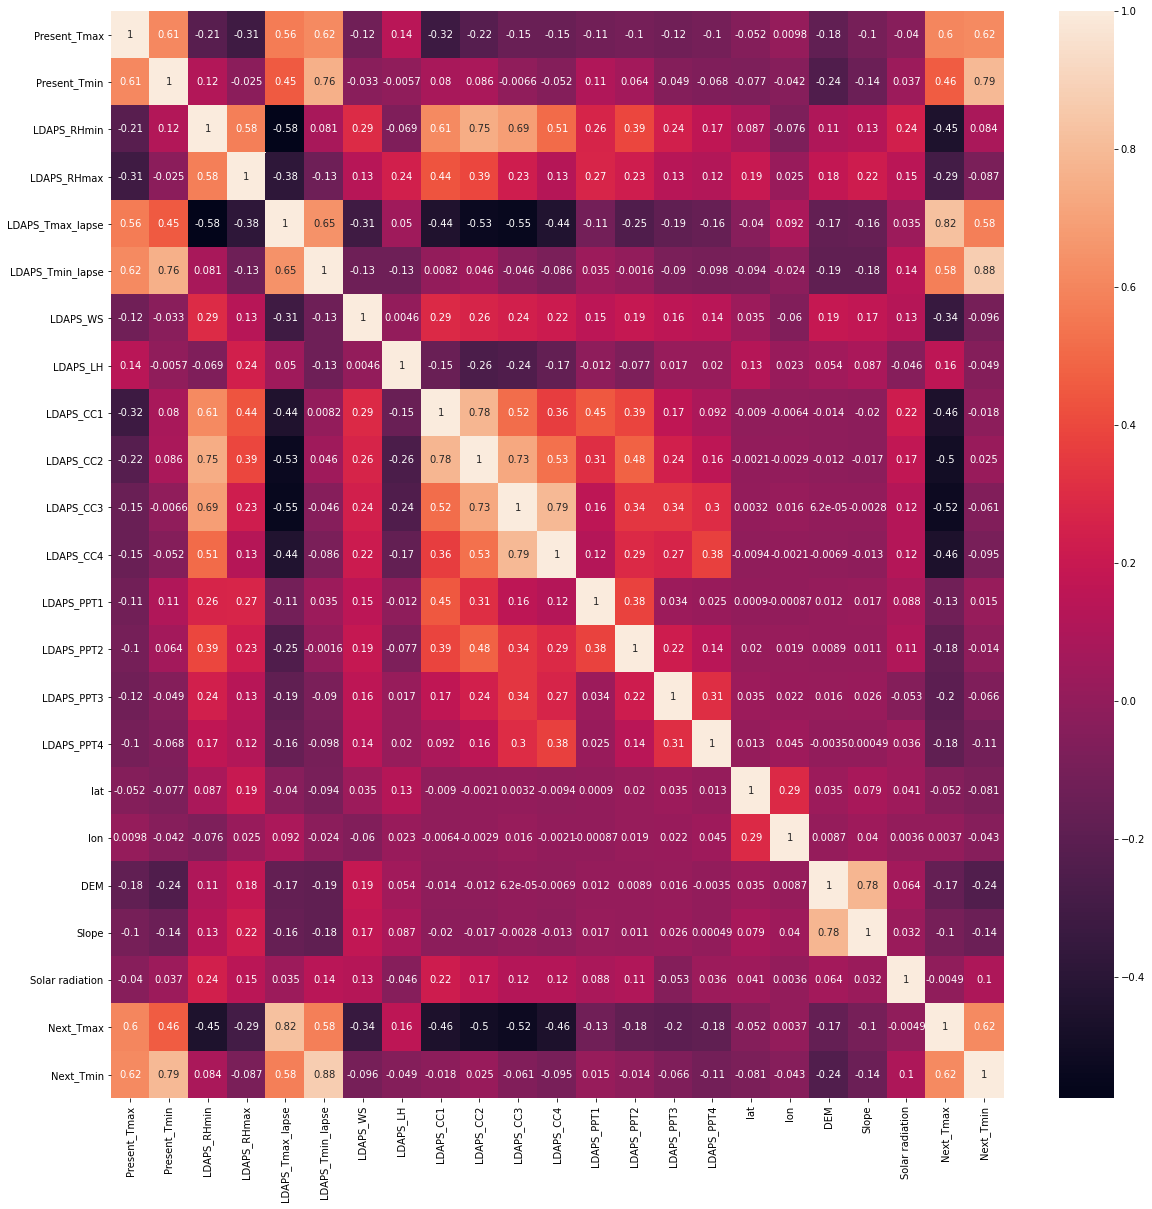

In [130]:
correlation=data_clean.corr(method='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True)

The features LDAPS_Tmin_lapse,present_min,LDAPS_Tmax_lapse,present_max  are positively correlated with next min and next max


In [210]:
col_r=['Date','station','Next_Tmax']
x1=df_clean.drop(col_r,axis=1)
y1=df_clean['Next_Tmax']

In [243]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
x=x1
y=y1

In [230]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor(),xgb.XGBRegressor(objective="reg:squarederror")]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [231]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

KNeighborsRegressor()
Mean absolute error 0.8275129533678756
Mean squared error 1.176284974093264
Root Mean squared error 1.0845667218264001
R2 Score 0.8823262690473241
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 1.1195067992837529
Mean squared error 2.1385876611289163
Root Mean squared error 1.4623910766716666
R2 Score 0.7860589953991511
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 1.058860103626943
Mean squared error 2.2303937823834197
Root Mean squared error 1.4934502945807804
R2 Score 0.7768748529079672
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 1.077047758845459
Mean squared error 1.95484530757012
Root Mean squared error 1.398157826416646
R2 Score 0.8044402964898636
-------------------------

In [ ]:
___cross validation

In [232]:
scorel=[]

In [233]:
from sklearn.utils import shuffle
scorel=[]
x=x1
y=y1
x, y = shuffle(x, y, random_state = 7)

In [234]:
from sklearn.model_selection import cross_val_score
k=KNeighborsRegressor()
scores=cross_val_score(k,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.88375784, 0.87938461, 0.86519387, 0.85204044, 0.85289422])

In [235]:
from sklearn.model_selection import cross_val_score
svr=SVR()
scores=cross_val_score(svr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.78290389, 0.79435575, 0.74934602, 0.74908316, 0.7407049 ])

In [236]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeRegressor()
scores=cross_val_score(dt,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.79533998, 0.8262115 , 0.75764228, 0.79152585, 0.77051875])

In [237]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.79969382, 0.80879845, 0.76625754, 0.76757536, 0.75938401])

In [238]:
from sklearn.model_selection import cross_val_score
l=Lasso()
scores=cross_val_score(l,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.72227783, 0.72715744, 0.69465227, 0.69185781, 0.6865628 ])

In [239]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
scores=cross_val_score(rf,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.91214827, 0.91788969, 0.89542699, 0.89856438, 0.89318292])

In [240]:
from sklearn.model_selection import cross_val_score
gb=GradientBoostingRegressor()
scores=cross_val_score(gb,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.8659167 , 0.87014978, 0.83486945, 0.83547379, 0.83491939])

In [241]:
from sklearn.model_selection import cross_val_score
xb=xgb.XGBRegressor()
scores=cross_val_score(xb,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.91473766, 0.92289753, 0.91639366, 0.90838051, 0.90436826])

Difference of predicted model and crossvalidation score



In [245]:
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor(),xgb.XGBRegressor()]
for i in range(0,8):
    print(models[i],"difference is",scorel[i]-r2list[i])

KNeighborsRegressor() difference is [ 0.00143157 -0.00294166 -0.0171324  -0.03028583 -0.02943205]
SVR() difference is [-0.0031551   0.00829675 -0.03671297 -0.03697583 -0.0453541 ]
DecisionTreeRegressor() difference is [ 0.01846512  0.04933665 -0.01923257  0.014651   -0.0063561 ]
LinearRegression() difference is [-0.00474647  0.00435815 -0.03818276 -0.03686494 -0.04505629]
Lasso() difference is [-0.00013507  0.00474454 -0.02776062 -0.03055509 -0.03585009]
RandomForestRegressor() difference is [-0.00099955  0.00474187 -0.01772084 -0.01458344 -0.0199649 ]
GradientBoostingRegressor() difference is [-0.00188083  0.00235225 -0.03292808 -0.03232374 -0.03287814]
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan,

In [ ]:
HyperTuning

In [183]:
from sklearn.model_selection import GridSearchCV
parameters = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }
grid = GridSearchCV(DecisionTreeRegressor(), param_grid = parameters, cv = 5, scoring = "r2")

In [184]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
grid.fit(xtrain,ytrain)

print("Best_parameters",grid.best_params_)

Best_parameters {'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [188]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
model=DecisionTreeRegressor(max_leaf_nodes=100,criterion='mse',max_depth=8,min_samples_split=10,min_samples_leaf=20)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
acc=model.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',(round(acc,2))*100)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('r2 score',(round(r2,2))*100)
     

Accuracy 80.0
Mean absolute error 1.064882555969157
Mean squared error 1.9801058326195777
Root Mean squared error 1.407162333428371
r2 score 80.0


Modelling and predicting minimum temperature

In [262]:
col_r=['Date','station','Next_Tmin']
x2=df_clean.drop(col_r,axis=1)
y2=df_clean['Next_Tmax']

In [263]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
x=x2
y=y2

In [264]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor()]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [265]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

KNeighborsRegressor()
Mean absolute error 0.5041658031088084
Mean squared error 0.4251552331606219
Root Mean squared error 0.6520392880499011
R2 Score 0.957468127518478
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 0.07703004505921984
Mean squared error 0.013363457223115162
Root Mean squared error 0.11560042051443914
R2 Score 0.9986631403915682
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 0.001865284974109127
Mean squared error 0.0012746113989637357
Root Mean squared error 0.03570170022511163
R2 Score 0.9998724898454591
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 1.1291370832001177e-14
Mean squared error 2.020137895318305e-28
Root Mean squared error 1.4213155509310045e-14
R2 Score 1.0
--------------

cross validation

In [285]:
scorel=[]

In [286]:
from sklearn.utils import shuffle
scorel=[]
x=x2
y=y2
x, y = shuffle(x, y, random_state = 7)

In [287]:
from sklearn.model_selection import cross_val_score
k=KNeighborsRegressor()
scores=cross_val_score(k,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.95867427, 0.96016053, 0.95596278, 0.95055585, 0.95078778])

In [288]:
from sklearn.model_selection import cross_val_score
svr=SVR()
scores=cross_val_score(svr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.99874682, 0.99883759, 0.99858676, 0.99818792, 0.99863446])

In [289]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeRegressor()
scores=cross_val_score(dt,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.99995107, 0.99982736, 0.99979823, 0.99997921, 0.9999823 ])

In [290]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([1., 1., 1., 1., 1.])

In [291]:
from sklearn.model_selection import cross_val_score
l=Lasso()
scores=cross_val_score(l,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.98822808, 0.98802539, 0.98854261, 0.98859797, 0.98871834])

In [292]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
scores=cross_val_score(rf,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.99989603, 0.99998425, 0.99991384, 0.99993788, 0.99999613])

In [293]:
from sklearn.model_selection import cross_val_score
gb=GradientBoostingRegressor()
scores=cross_val_score(gb,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.9999253 , 0.99996488, 0.99992216, 0.99995788, 0.99996606])

Difference of predicted model and crossvalidation score



In [295]:
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor()]
for i in range(0,7):
    print(models[i],"difference is",scorel[i]-r2list[i])

KNeighborsRegressor() difference is [ 0.00120614  0.00269241 -0.00150535 -0.00691228 -0.00668035]
SVR() difference is [ 8.36824158e-05  1.74450502e-04 -7.63795593e-05 -4.75216744e-04
 -2.86757978e-05]
DecisionTreeRegressor() difference is [ 7.85784827e-05 -4.51325160e-05 -7.42575966e-05  1.06715658e-04
  1.09807967e-04]
LinearRegression() difference is [0. 0. 0. 0. 0.]
Lasso() difference is [ 1.62488009e-04 -4.02057563e-05  4.77018163e-04  5.32374228e-04
  6.52745670e-04]
RandomForestRegressor() difference is [-2.58937929e-06  8.56225885e-05  1.52149693e-05  3.92583888e-05
  9.75073019e-05]
GradientBoostingRegressor() difference is [-6.52898808e-06  3.30521801e-05 -9.67099434e-06  2.60490920e-05
  3.42336401e-05]


Hyper Tuning

In [301]:
from sklearn.model_selection import GridSearchCV
parameters = { "normalize":[True, False], "copy_X":[True, False],
              "fit_intercept": [True, False]
              }
grid = GridSearchCV(LinearRegression(), param_grid = parameters, cv = 5, scoring = "r2")

In [302]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
grid.fit(xtrain,ytrain)

print("Best_parameters",grid.best_params_)

Best_parameters {'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [303]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
model1=LinearRegression(copy_X=True,fit_intercept=True,normalize=True)
model1.fit(xtrain,ytrain)
p=model1.predict(xtest)
acc=model1.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',(round(acc,2))*100)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('r2 score',(round(r2,2))*100)
     

Accuracy 100.0
Mean absolute error 3.469878385771474e-15
Mean squared error 2.3811337251064903e-29
Root Mean squared error 4.879686183666415e-15
r2 score 100.0


before and after hyper tuning Accuracy is 100%

In [ ]:
Saving the file

In [304]:
from joblib import dump
dump(model, 'model_maxtemp.joblib')

['model_maxtemp.joblib']

In [305]:
from joblib import dump
dump(model1, 'model_mintemp.joblib')

['model_mintemp.joblib']

In [306]:
from joblib import load
loaded = load('model_maxtemp.joblib')

In [307]:
from joblib import load
loaded = load('model_mintemp.joblib')